<a href="https://colab.research.google.com/github/ShvetsovEgor/ML/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Скачайте датасет mnist

In [ ]:
mnist = tf.keras.datasets.mnist


batch_size = 256

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0
n_values = 10

y_train_full_one_hot = tf.one_hot(y_train_full, n_values)
y_test_one_hot = tf.one_hot(y_test, n_values)

In [ ]:
val_size = 0.1
size = x_train_full.shape[0]

x_val, y_val_one_hot = x_train_full[:int(size * 0.1)], y_train_full_one_hot[:int(size * 0.1)]
x_train, y_train_one_hot = x_train_full[int(size * 0.1):], y_train_full_one_hot[int(size * 0.1):]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot))
train_dataset = train_dataset.shuffle(1024)
train_dataset = train_dataset.batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val_one_hot))
val_dataset = val_dataset.shuffle(1024)
val_dataset = val_dataset.batch(batch_size)

Напишите модель, подобную модели с первой части семинара.

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['Accuracy', 'Precision', 'Recall'])


Выведите summary модели.


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
_________________________________________________________________


In [ ]:
%pip install livelossplot

In [29]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

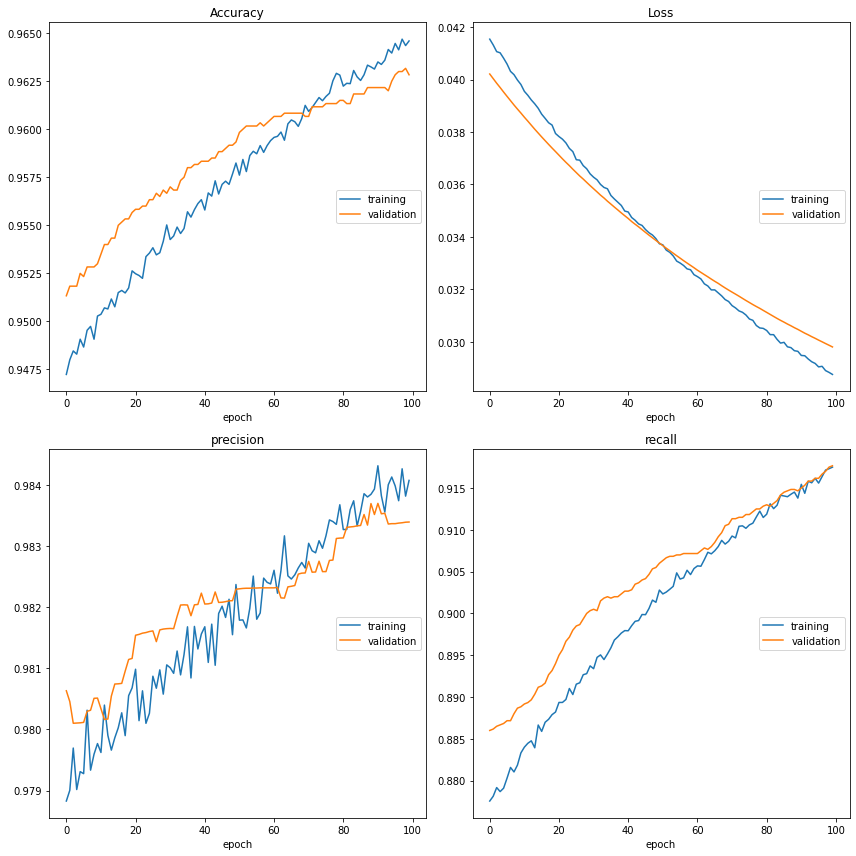

Accuracy
	training         	 (min:    0.947, max:    0.965, cur:    0.965)
	validation       	 (min:    0.951, max:    0.963, cur:    0.963)
Loss
	training         	 (min:    0.029, max:    0.042, cur:    0.029)
	validation       	 (min:    0.030, max:    0.040, cur:    0.030)
precision
	training         	 (min:    0.979, max:    0.984, cur:    0.984)
	validation       	 (min:    0.980, max:    0.984, cur:    0.983)
recall
	training         	 (min:    0.878, max:    0.918, cur:    0.918)
	validation       	 (min:    0.886, max:    0.918, cur:    0.918)


In [56]:
from livelossplot import PlotLossesKeras

model.fit(train_dataset, validation_data=val_dataset, epochs=100, 
          callbacks=[PlotLossesKeras()], verbose=False)

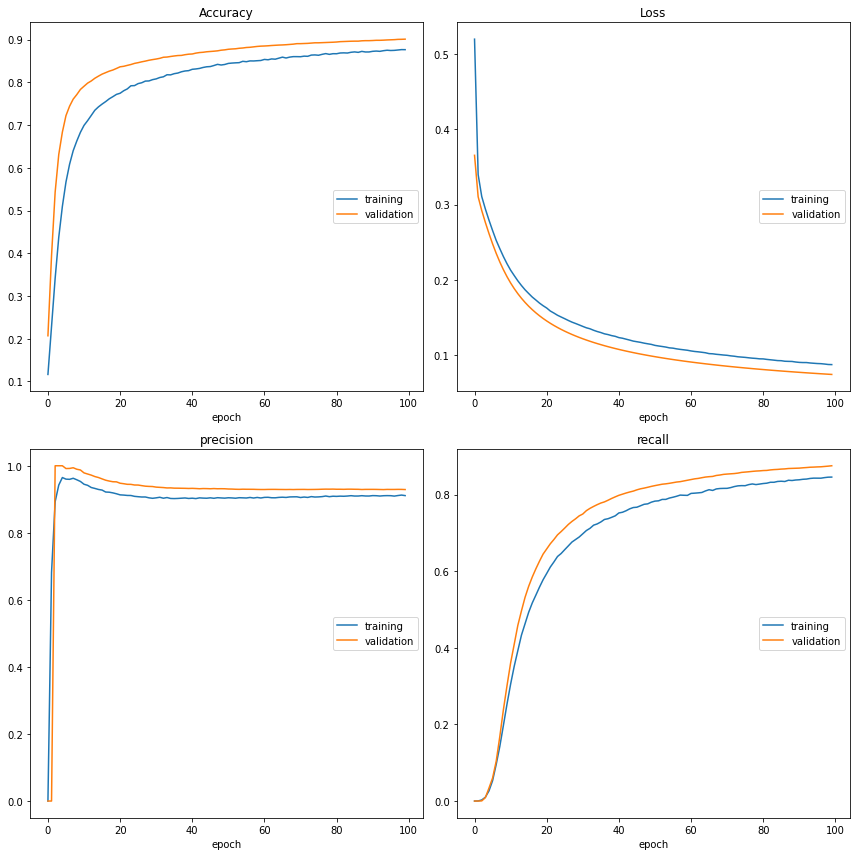

Accuracy
	training         	 (min:    0.117, max:    0.877, cur:    0.876)
	validation       	 (min:    0.207, max:    0.901, cur:    0.901)
Loss
	training         	 (min:    0.087, max:    0.520, cur:    0.087)
	validation       	 (min:    0.074, max:    0.365, cur:    0.074)
precision
	training         	 (min:    0.000, max:    0.965, cur:    0.911)
	validation       	 (min:    0.000, max:    1.000, cur:    0.929)
recall
	training         	 (min:    0.000, max:    0.846, cur:    0.846)
	validation       	 (min:    0.000, max:    0.875, cur:    0.875)


In [57]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')])

model1.compile(
    optimizer='sgd',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['Accuracy', 'Precision', 'Recall'])
from livelossplot import PlotLossesKeras

model1.fit(train_dataset, validation_data=val_dataset, epochs=100, 
          callbacks=[PlotLossesKeras()], verbose=False)

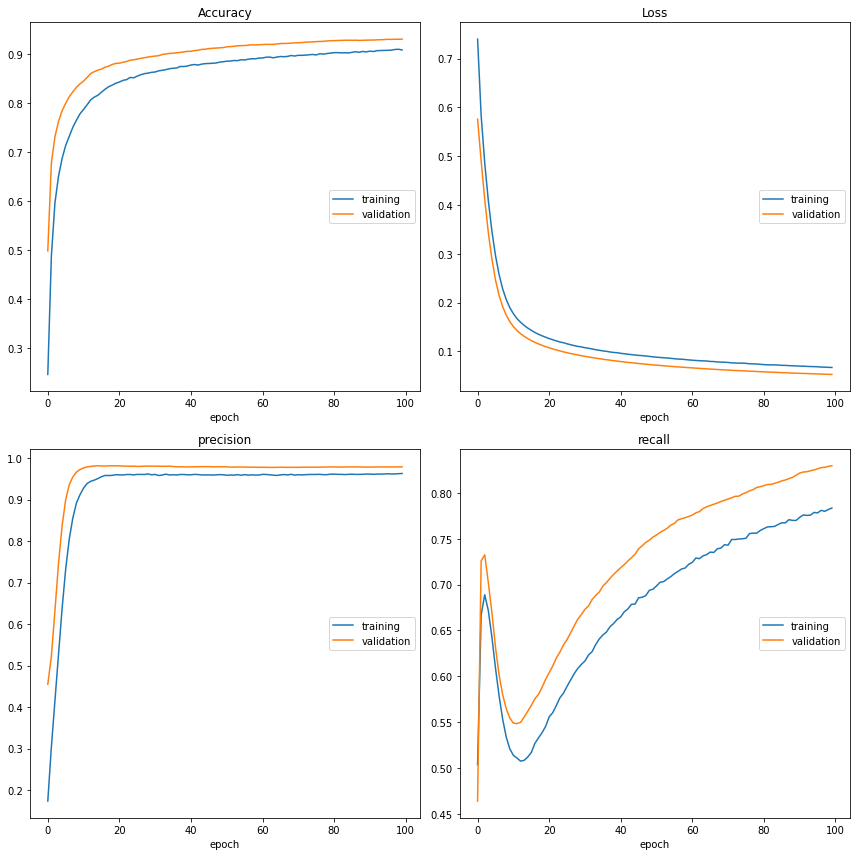

Accuracy
	training         	 (min:    0.246, max:    0.909, cur:    0.908)
	validation       	 (min:    0.498, max:    0.930, cur:    0.930)
Loss
	training         	 (min:    0.067, max:    0.740, cur:    0.067)
	validation       	 (min:    0.053, max:    0.576, cur:    0.053)
precision
	training         	 (min:    0.174, max:    0.963, cur:    0.963)
	validation       	 (min:    0.455, max:    0.981, cur:    0.979)
recall
	training         	 (min:    0.504, max:    0.784, cur:    0.784)
	validation       	 (min:    0.464, max:    0.830, cur:    0.830)


In [58]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])
model2.compile(
    optimizer='sgd',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['Accuracy', 'Precision', 'Recall'])
from livelossplot import PlotLossesKeras

model2.fit(train_dataset, validation_data=val_dataset, epochs=100, 
          callbacks=[PlotLossesKeras()], verbose=False)
